In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('crop_yield.csv')
df = df.loc[
    (df['Region'] == 'South') & 
    (df['Soil_Type'] == 'Clay') & 
    (df['Crop'] == 'Soybean')
]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6923 entries, 73 to 999955
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  6923 non-null   object 
 1   Soil_Type               6923 non-null   object 
 2   Crop                    6923 non-null   object 
 3   Rainfall_mm             6923 non-null   float64
 4   Temperature_Celsius     6923 non-null   float64
 5   Fertilizer_Used         6923 non-null   bool   
 6   Irrigation_Used         6923 non-null   bool   
 7   Weather_Condition       6923 non-null   object 
 8   Days_to_Harvest         6923 non-null   int64  
 9   Yield_tons_per_hectare  6923 non-null   float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 500.3+ KB


In [3]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
73,South,Clay,Soybean,601.421346,30.234396,True,True,Sunny,80,6.383981
402,South,Clay,Soybean,313.797307,34.336163,True,False,Sunny,101,4.486535
512,South,Clay,Soybean,408.559770,24.042153,True,False,Cloudy,132,4.040488
1043,South,Clay,Soybean,610.999730,21.859592,True,False,Rainy,66,5.056395
1087,South,Clay,Soybean,263.829392,27.452813,True,True,Cloudy,60,5.525247


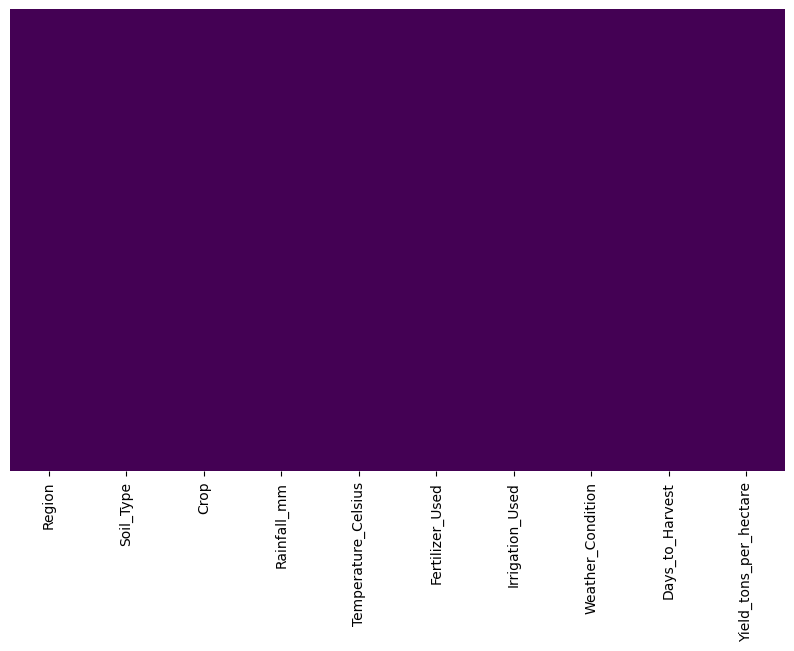

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

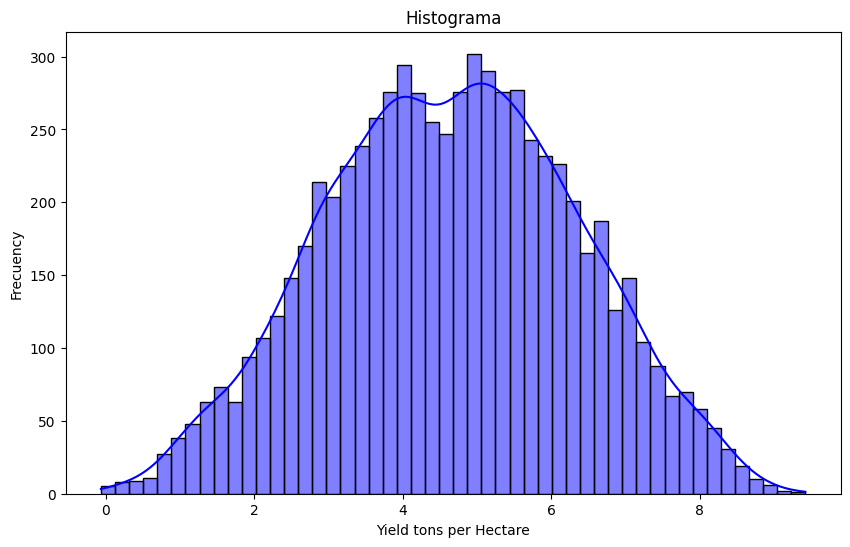

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Yield_tons_per_hectare'], bins=50, kde=True, color='blue')
plt.title('Histograma')
plt.xlabel('Yield tons per Hectare')
plt.ylabel('Frecuency')
plt.show()

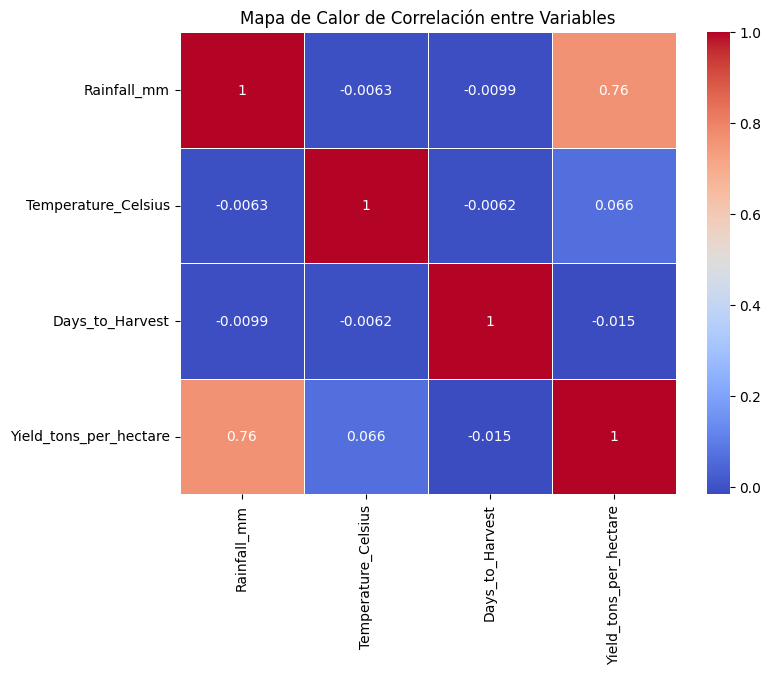

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()

In [7]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[['Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition']])
dummy_columns = encoder.get_feature_names_out(['Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition'])
encoded_df = pd.DataFrame(encoded_data, columns=dummy_columns)
df = df.drop(columns=['Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition'])
df.reset_index(drop=True, inplace=True)

df = df.reset_index(drop=True).join(encoded_df)
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Fertilizer_Used_False,Fertilizer_Used_True,Irrigation_Used_False,Irrigation_Used_True,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,South,Clay,Soybean,601.421346,30.234396,80,6.383981,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,South,Clay,Soybean,313.797307,34.336163,101,4.486535,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,South,Clay,Soybean,408.559770,24.042153,132,4.040488,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,South,Clay,Soybean,610.999730,21.859592,66,5.056395,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,South,Clay,Soybean,263.829392,27.452813,60,5.525247,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918,South,Clay,Soybean,467.803469,16.000531,80,4.399968,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6919,South,Clay,Soybean,849.163397,39.751457,102,5.956135,1.0,0.0,0.0,1.0,1.0,0.0,0.0
6920,South,Clay,Soybean,331.964441,28.760452,131,5.894360,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6921,South,Clay,Soybean,512.648027,33.453606,114,4.747394,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [8]:
columns_to_drop = ['Region', 'Soil_Type', 'Crop']  # Ajusta según las columnas que quieras eliminar
df = df.drop(columns=columns_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6923 entries, 0 to 6922
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rainfall_mm               6923 non-null   float64
 1   Temperature_Celsius       6923 non-null   float64
 2   Days_to_Harvest           6923 non-null   int64  
 3   Yield_tons_per_hectare    6923 non-null   float64
 4   Fertilizer_Used_False     6923 non-null   float64
 5   Fertilizer_Used_True      6923 non-null   float64
 6   Irrigation_Used_False     6923 non-null   float64
 7   Irrigation_Used_True      6923 non-null   float64
 8   Weather_Condition_Cloudy  6923 non-null   float64
 9   Weather_Condition_Rainy   6923 non-null   float64
 10  Weather_Condition_Sunny   6923 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 595.1 KB


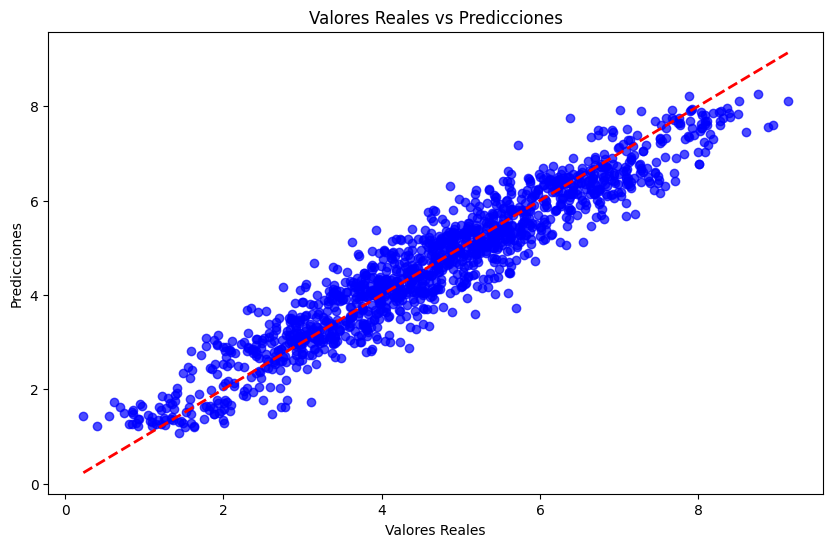

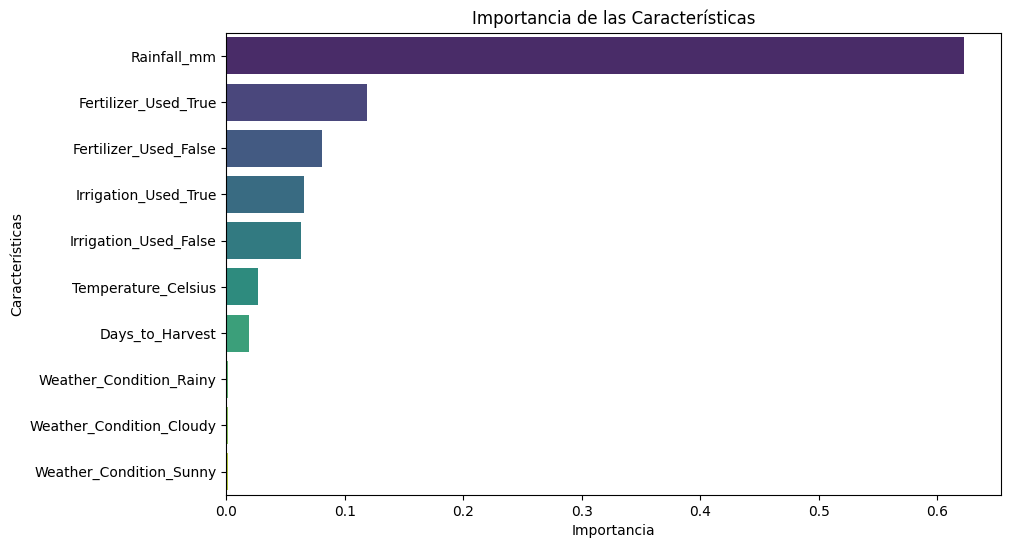

Mean Squared Error: 0.2786930480615685
R^2 Score: 0.90213389905425


In [9]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['Yield_tons_per_hectare'])  # Reemplaza con el nombre correcto de la columna objetivo
y = df['Yield_tons_per_hectare']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_leaf=5, max_features='sqrt')

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Valores Reales vs Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

# Obtener la importancia de las características
importances = rf_model.feature_importances_
features = X.columns

# Crear un DataFrame para ordenar las importancias
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")